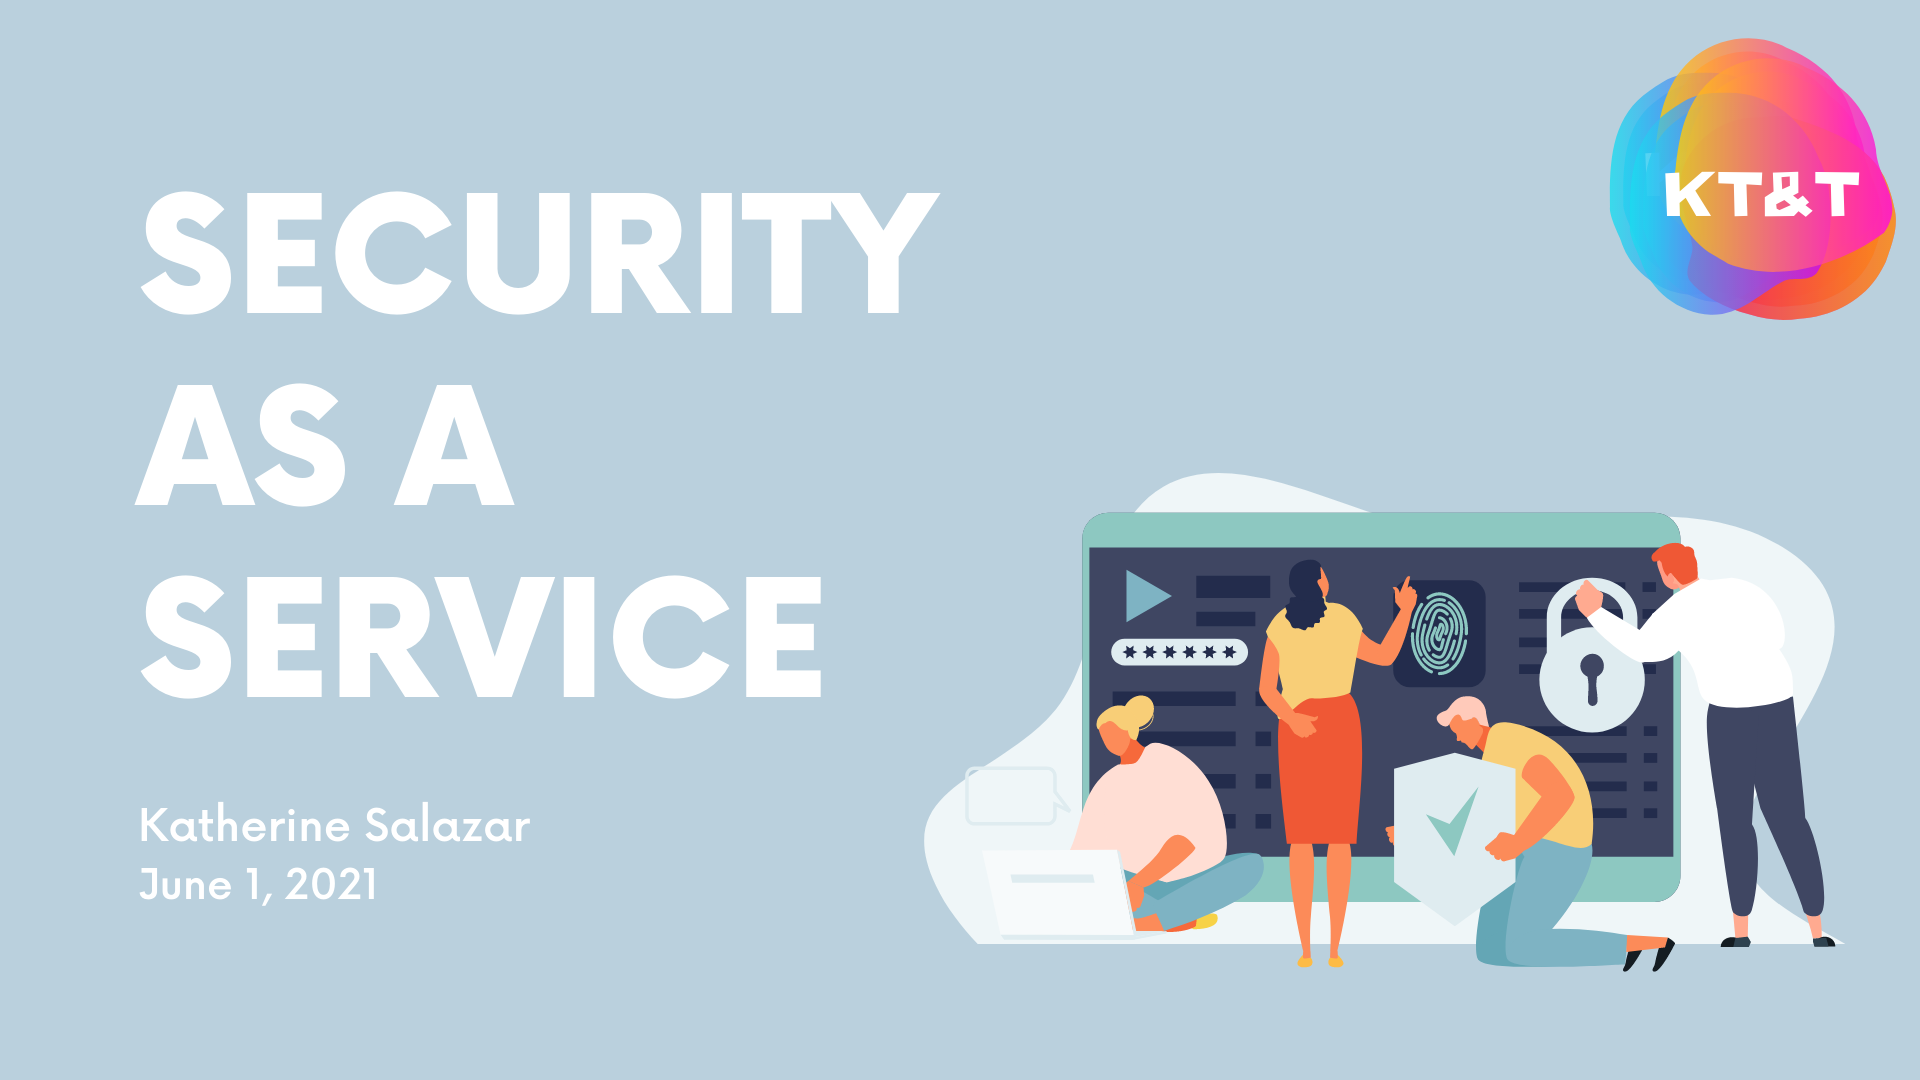

In [ ]:
# Insert executive summary silde here 

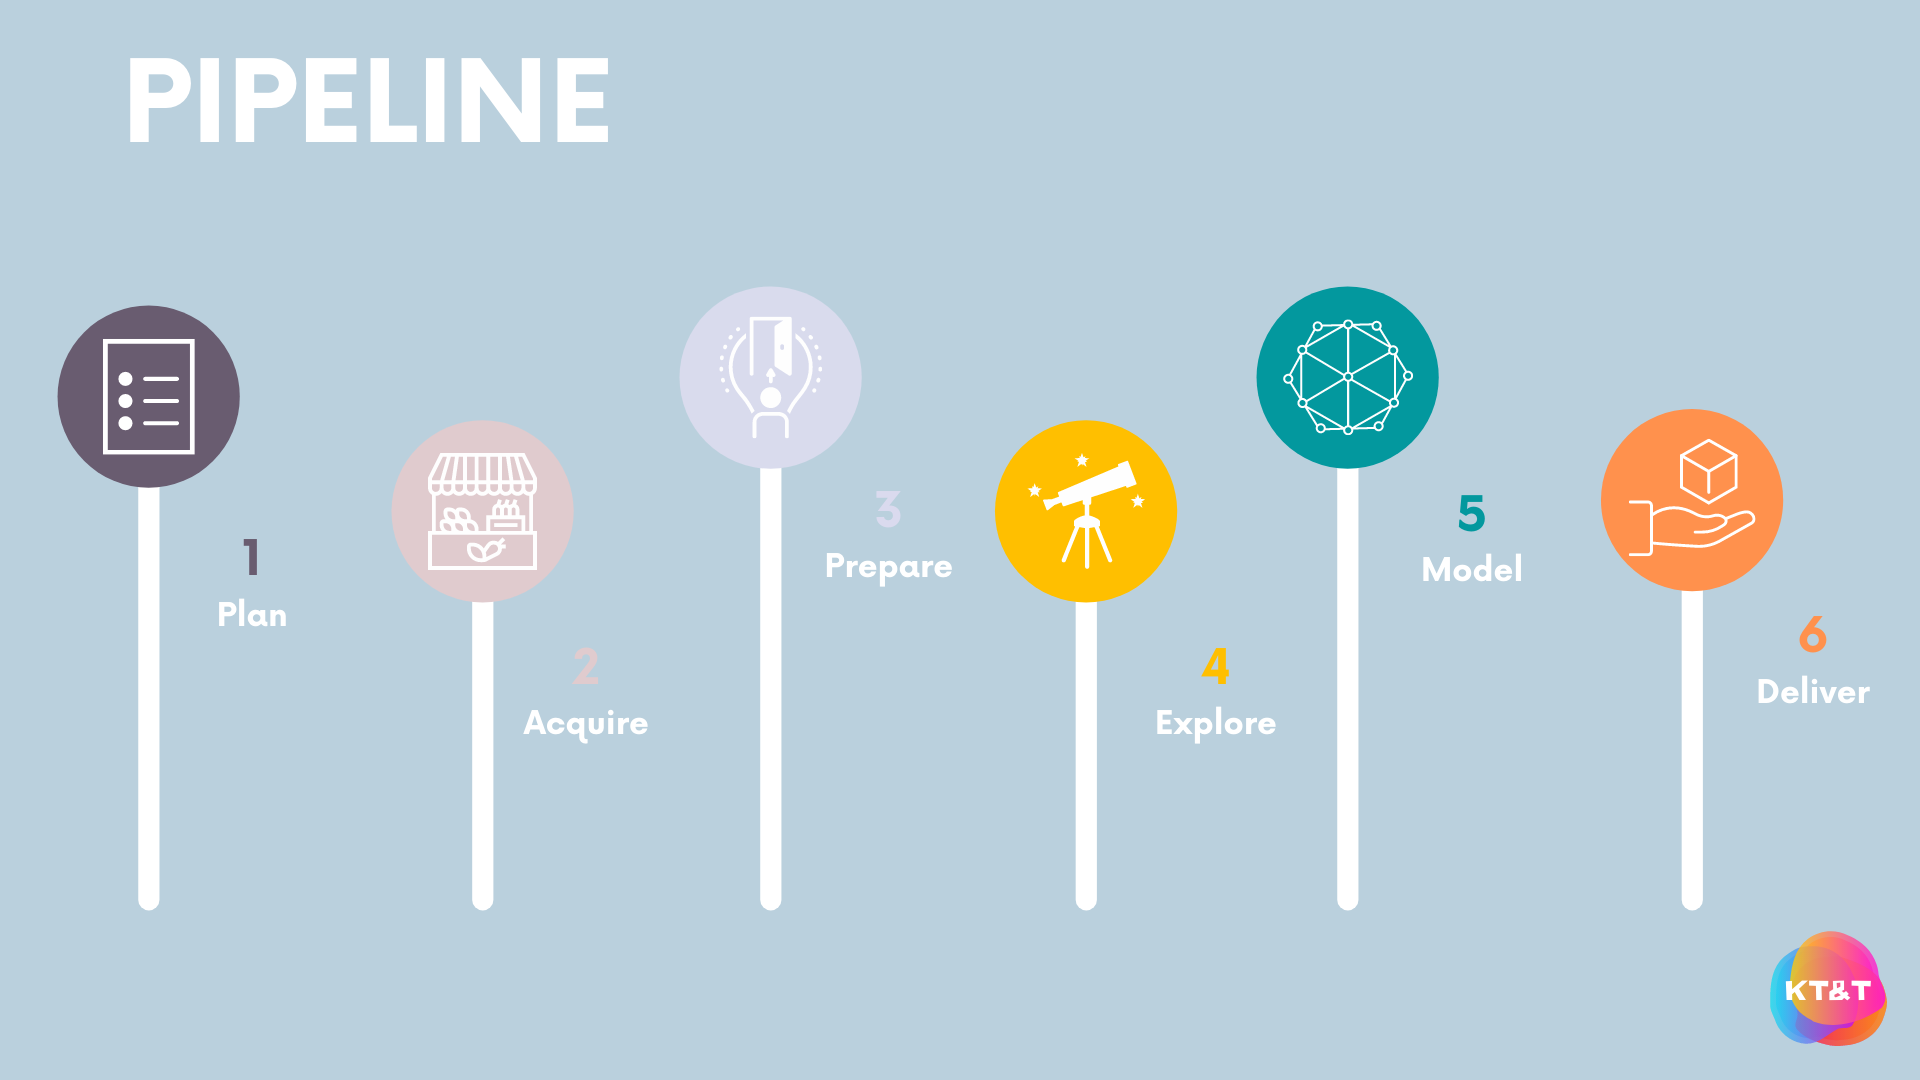